## Problem Statement:<br>
Forecast the Airlines data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [192]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot
from pandas import DataFrame
from numpy import sqrt
from numpy import log
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [193]:
#reading csv file using pandas
data = pd.read_excel('Airlines+Data.xlsx',header=0,parse_dates=True)

## Performing EDA

In [194]:
#displaying  first 5 records 
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [195]:
#displaying last 5 records
data.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [196]:
#shape of dataset
data.shape  

(96, 2)

Dataset has `96` rows and `2` columns

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [198]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


#### The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [199]:
data.ndim

2

In [200]:
data.axes

[RangeIndex(start=0, stop=96, step=1),
 Index(['Month', 'Passengers'], dtype='object')]

In [201]:
data.nunique()

Month         96
Passengers    80
dtype: int64

In [202]:
#making the month column as index
data.set_index('Month',inplace=True)

In [203]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [204]:
data.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Month')

In [205]:
#Checking for missing data
data.isna().sum()

Passengers    0
dtype: int64

#### Dataset has no any NA values

In [206]:
#checking for duplication of data
data[data.duplicated()].shape

(16, 1)

In [207]:
data[data.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [208]:
#removing duplicate values
data.drop_duplicates(inplace=True)

In [209]:
#checking for duplication of data
data[data.duplicated()].shape

(0, 1)

In [210]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


In [211]:
df = data.copy() #copied the data from dataset to df so that any changes done to coppied data does not reflect to original data

In [212]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


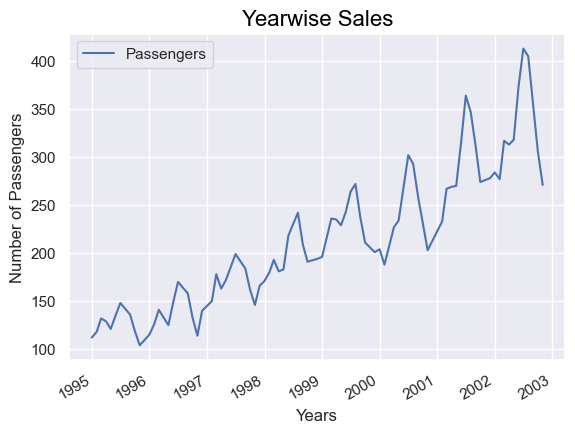

In [213]:
df.plot()
plt.title('Yearwise Sales',fontdict={'fontsize': 16,'color': 'black'})
plt.xlabel('Years')
plt.ylabel('Number of Passengers')
plt.show()

<h3>Observations:</h3>
There is an positive correlation between number of passengers and years<br>
as the new year is coming the passengers travelling through an airlines is gradually increasing <br>
The graph shows the data has Upward Trend<br>
and it has multiplicative seasonality <br>
There is an upward trend in the numbers of passangers as the number of years going increases<br>
at some intervals' the peak is getting up and down which know as seasonality <br>

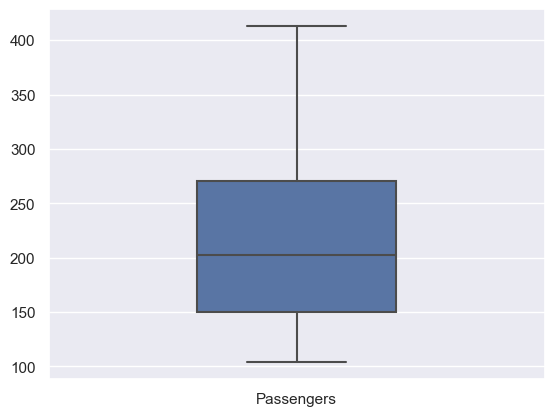

In [214]:
#checking for outleries
sns.boxplot(data =df,width=0.4)
plt.show()

<h3>Observations:</h3>
The sales has Mean: 213 <br>
There is no any outlier has been detected<br>
IQR range is betwen 150 to 260

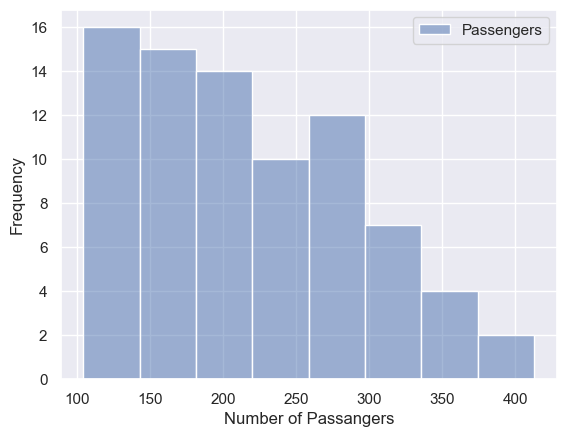

In [215]:
#histogram for sales
sns.histplot(df)
plt.xlabel('Number of Passangers')
plt.ylabel('Frequency')
plt.show()

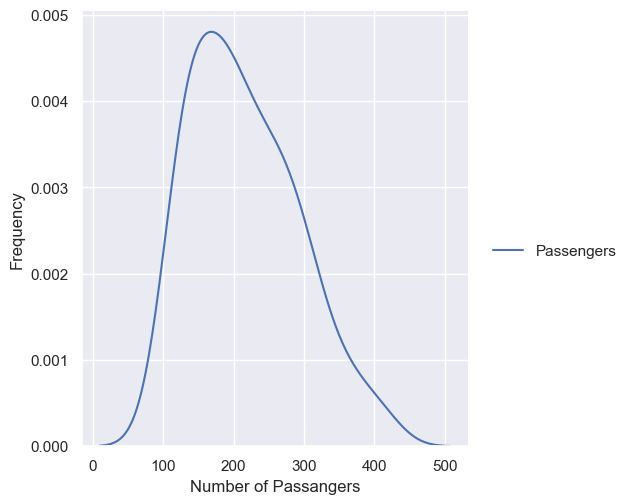

In [216]:
#hdisplot for sales
sns.displot(df, kind="kde")
plt.xlabel('Number of Passangers')
plt.ylabel('Frequency')
plt.show()

<h3>Observations:</h3>
There is an showing nearly Normal distribution in graph<br>
Number of passangers between 50 to 460 the variance is high <br>
At value 180 the number of passangers frequency is high

In [217]:
np.array(df["Passengers"])

array([112, 118, 132, 129, 121, 135, 148, 136, 119, 104, 115, 126, 141,
       125, 149, 170, 158, 133, 114, 140, 145, 150, 178, 163, 172, 199,
       184, 162, 146, 166, 171, 180, 193, 181, 183, 218, 230, 242, 209,
       191, 194, 196, 236, 235, 229, 243, 264, 272, 237, 211, 201, 204,
       188, 227, 234, 302, 293, 259, 203, 233, 267, 269, 270, 315, 364,
       347, 312, 274, 278, 284, 277, 317, 313, 318, 374, 413, 405, 355,
       306, 271], dtype=int64)

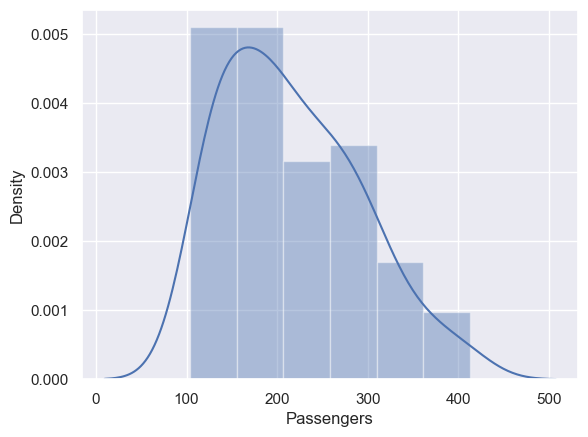

In [218]:
sns.set_theme()
rk= sns.distplot(df["Passengers"],kde=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


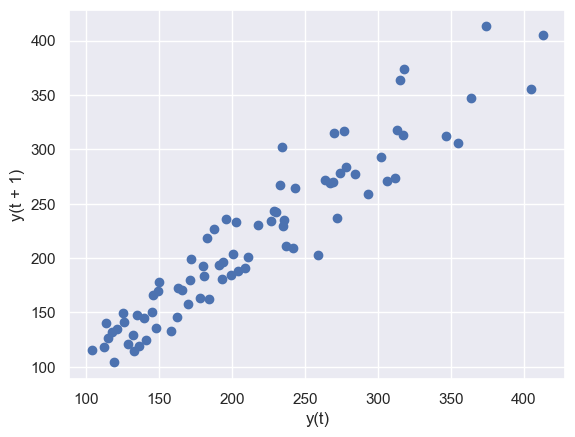

In [219]:
from pandas.plotting import lag_plot
lag_plot(df["Passengers"])
plt.show()

<h3>Observations:</h3>
The lag_plot graph shows the time series is random <br>

## UpSampling

Resampling involves changing the frequency of your time series observations. Two types of resampling are: Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.

In [220]:
upsampled = df.resample('M').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31         NaN
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31         NaN
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30         NaN
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31         NaN
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30         NaN
1997-07-31       199.0
1997-08-31         NaN


In [221]:
interpolated = upsampled.interpolate(method='linear') #interplation was done for nan values which we get after doing upsampling by month
print(interpolated.head(15))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       142.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       109.5
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0


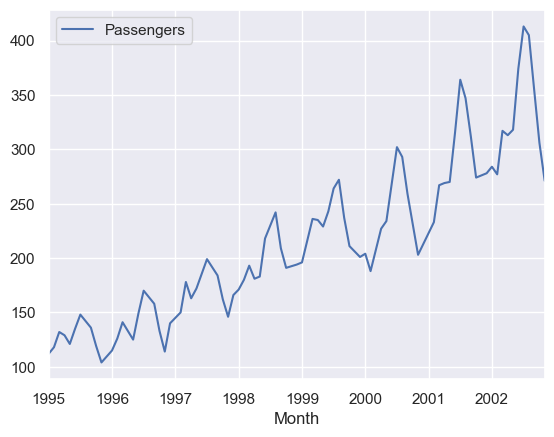

In [222]:
interpolated.plot()
plt.show()

In [223]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


## Tranformations

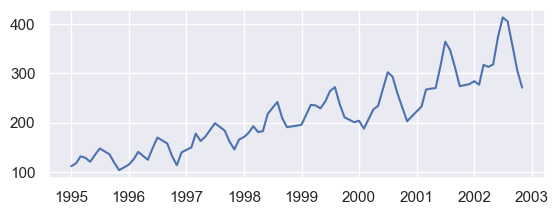

In [224]:
# line plot
plt.subplot(211)
plt.plot(df)
plt.show()

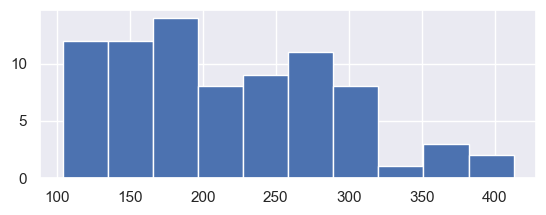

In [225]:
# histogram
plt.subplot(212)
plt.hist(df)
plt.show()

## Square Root Transform

In [226]:
dataframe = DataFrame(df.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

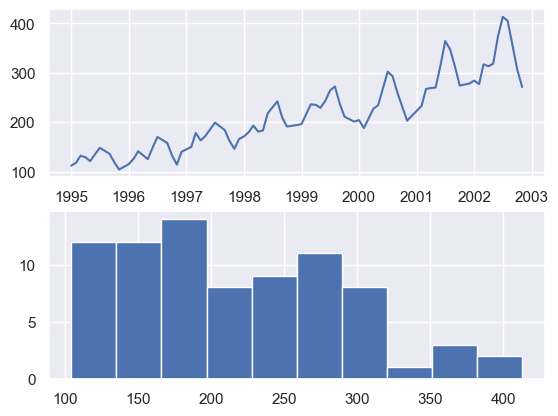

In [227]:
# line plot
plt.subplot(211)
plt.plot(df['Passengers'])
# histogram
plt.subplot(212)
plt.hist(df['Passengers'])
plt.show()

## Log Transform

In [228]:
dataframe = DataFrame(df.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

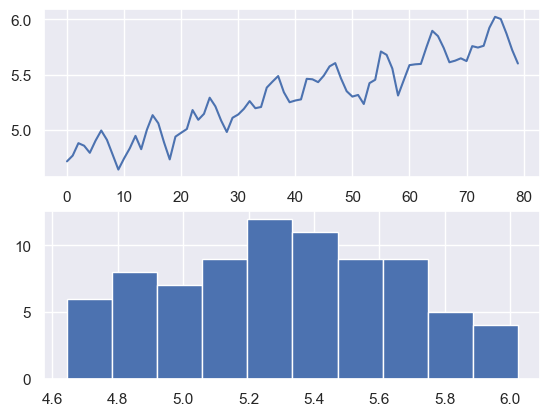

In [229]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [230]:
Train = interpolated.head(81)
Test = interpolated.tail(14)

## Moving Average

A moving average is a technique that calculates the overall trend in a data set. In operations management, the data set is sales volume from historical data of the company. This technique is very useful for forecasting short-term trends. It is simply the average of a select set of time periods

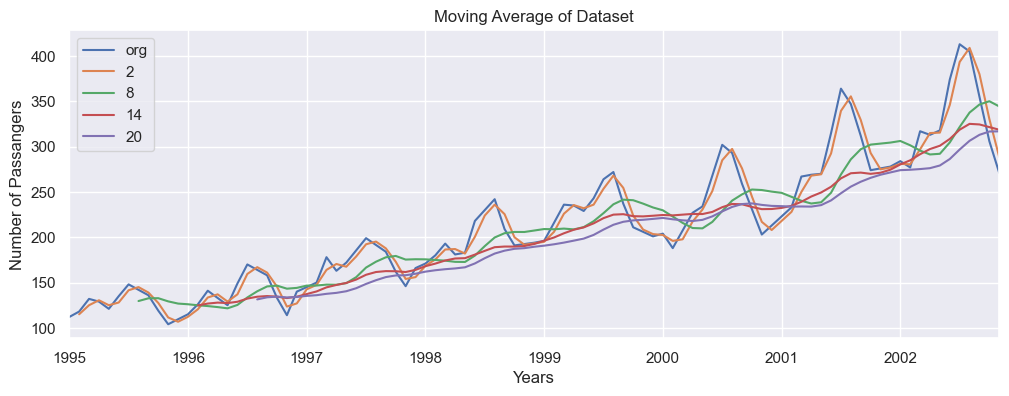

In [231]:
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(2,24,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.title('Moving Average of Dataset')
plt.xlabel('Years')
plt.ylabel('Number of Passangers')
plt.show()

<h3>Observations:</h3>
The original number of passangers according to years have trend and seasonality<br>
but as we increase the number range the seasonality getting vanished<br>
and at the end the best fitted line getting which fits maximum numbers od data points on a line

## Time series decomposition plot

Time series decomposition is usually presented as an analysis step to be performed before generating predictions, but it can also be used as a forecasting method in and of itself if you know what the structure of your time series will look like beforehand

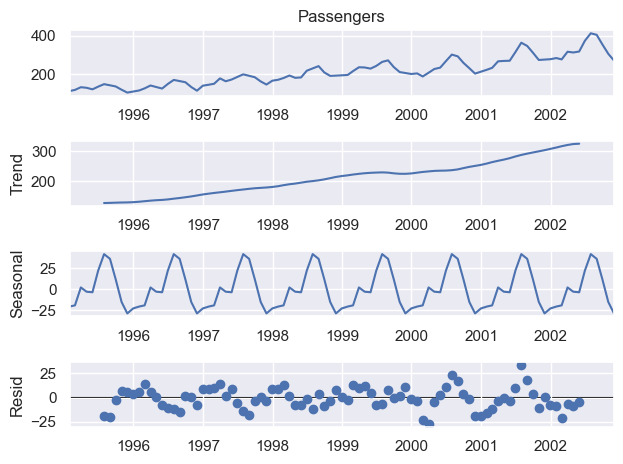

In [232]:
decompose_ts_add = seasonal_decompose(interpolated['Passengers'],period=12)
decompose_ts_add.plot()
plt.show()

<h3>Observations:</h3>
By seasonal_decompose we have got the forecasting components<br>
In trend component we got Upward trend<br>
In seasonal component we got additive seasonality <br>
And Resid part covers less numbers of datapoints on the line

## ACF plots and PACF plots

An ACF measures and plots the average correlation between data points in time series and previous values of the series measured for different lag lengths. A PACF is similar to an ACF except that each partial correlation controls for any correlation between observations of a shorter lag length

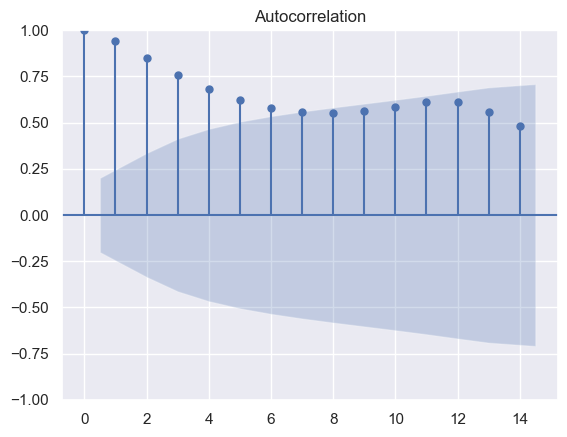

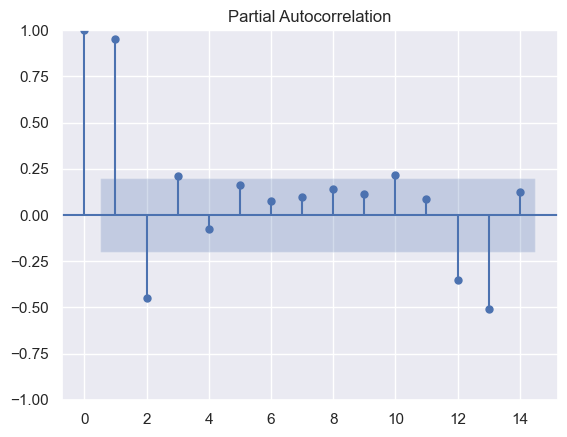

In [233]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.Passengers,lags=14)
tsa_plots.plot_pacf(interpolated.Passengers,lags=14)
plt.show()

<h3>Observations:</h3>
The autocorrelation graph shows that lags getting gradually decresing<br>
so we can see that data is non-Stationary<br>
In ACF there are seven significant spikes <br>
In PACF there are six significant spikes

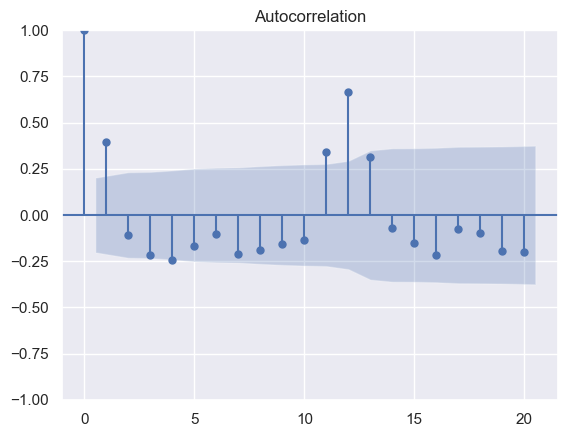

In [234]:
sales_diff = interpolated.Passengers.diff(periods = 1)
tsa_plots.plot_acf(sales_diff[1:])
plt.show()

<h3>Observations:</h3>
The data has been converted into Stationary<br>
In ACF there are only four significant spikes <br>

## Evaluation Metric MAPE

In [235]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Method

In [236]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

11.18163872245304

## Holt method

In [237]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

12.424434303922729

## Holts winter exponential smoothing with additive seasonality and additive trend

In [238]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

3.513732035746134

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [239]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

3.233263960121953

In [240]:
from sklearn.metrics import mean_squared_error
rmse_hwe_mul_add = sqrt(mean_squared_error(pred_hwe_mul_add,Test.Passengers))
rmse_hwe_mul_add

12.632692127672167

## Final Model by combining train and test

In [241]:
hwe_model_mul_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="mul",trend="add",seasonal_periods=10).fit()

In [242]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

2002-12-31    278.248664
2003-01-31    290.389399
2003-02-28    293.310733
2003-03-31    301.940953
2003-04-30    305.132181
2003-05-31    306.561846
2003-06-30    299.027105
2003-07-31    291.309900
2003-08-31    289.173426
2003-09-30    287.816297
Freq: M, dtype: float64

In [243]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [244]:
interpolated.reset_index(inplace=True)

In [245]:
#adding columns t,t_squared and sales_log
interpolated['t'] = np.arange(1,96)
interpolated['t_squared'] = interpolated['t']**2
interpolated["log_passangers"] =np.log(interpolated["Passengers"])

In [246]:
interpolated

,Month,Passengers,t,t_squared,log_passangers
0,1995-01-31,112.0,1,1,4.718499
1,1995-02-28,118.0,2,4,4.770685
2,1995-03-31,132.0,3,9,4.882802
3,1995-04-30,129.0,4,16,4.859812
4,1995-05-31,121.0,5,25,4.795791
...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,6.023448
91,2002-08-31,405.0,92,8464,6.003887
92,2002-09-30,355.0,93,8649,5.872118
93,2002-10-31,306.0,94,8836,5.723585


In [247]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.Month.dt.strftime("%Y") # month extraction

In [248]:
interpolated

,Month,Passengers,t,t_squared,log_passangers,month,year
0,1995-01-31,112.0,1,1,4.718499,Jan,1995
1,1995-02-28,118.0,2,4,4.770685,Feb,1995
2,1995-03-31,132.0,3,9,4.882802,Mar,1995
3,1995-04-30,129.0,4,16,4.859812,Apr,1995
4,1995-05-31,121.0,5,25,4.795791,May,1995
...,...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,6.023448,Jul,2002
91,2002-08-31,405.0,92,8464,6.003887,Aug,2002
92,2002-09-30,355.0,93,8649,5.872118,Sep,2002
93,2002-10-31,306.0,94,8836,5.723585,Oct,2002


In [249]:
months = pd.get_dummies(interpolated['month']) ## converting the dummy variables for month column

In [250]:
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,1,0,0,0,0,0,0
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0


In [251]:
#storing the months as serial wise again in months variable
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [252]:
Airlines = pd.concat([interpolated,months],axis=1)

In [253]:
Airlines

,Month,Passengers,t,t_squared,log_passangers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,112.0,1,1,4.718499,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,4.770685,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,4.882802,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-30,129.0,4,16,4.859812,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,4.795791,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,6.023448,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0
91,2002-08-31,405.0,92,8464,6.003887,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-30,355.0,93,8649,5.872118,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-31,306.0,94,8836,5.723585,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0


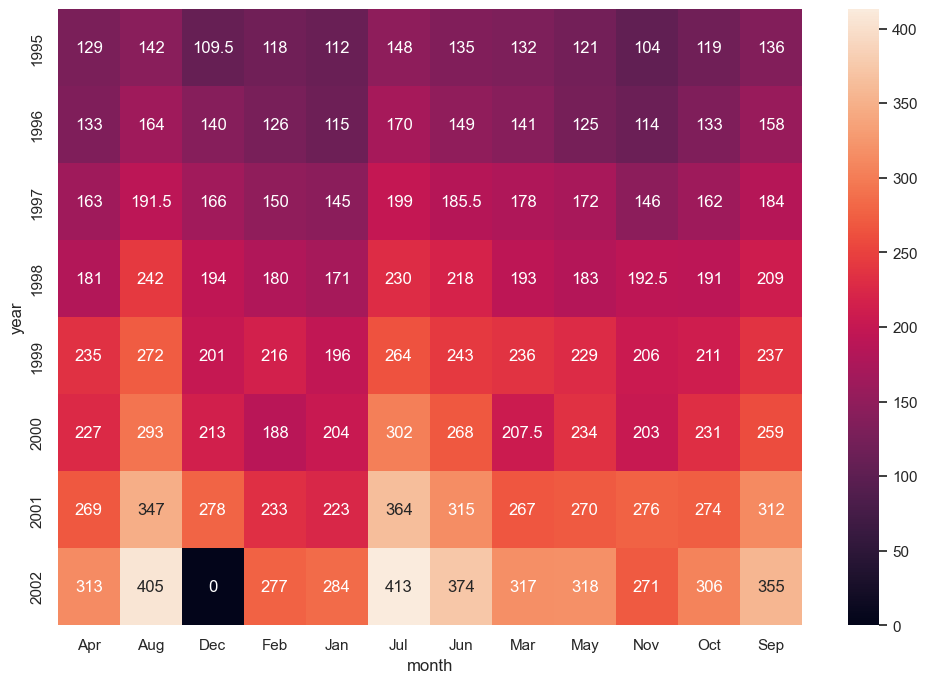

In [254]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

<h3>Observations:</h3>
By heatmap we can see that from 2000 to 2002 in the month of July the largest number of passangers travels by Airlines following to the months of Augest and June<br>
In year 2002 in the month December no passangers travel by airline<br>
So, we can assume that August, July and June months are good to increase the revenue as large number of passangers travels by ailines

<AxesSubplot:xlabel='year', ylabel='Passengers'>

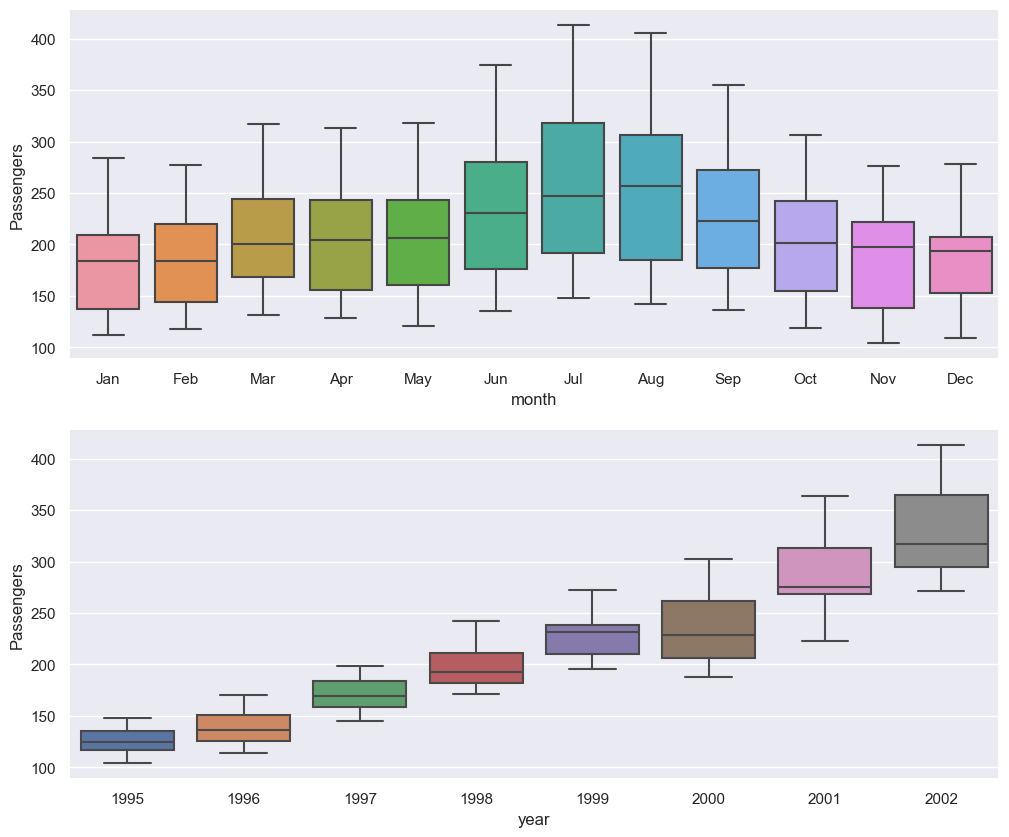

In [255]:
# Boxplot analysis
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)

<h3>Observations:</h3>
The month of August has highest mean foloowed by July and June<br>
The January has lowest mean<br>
The highest mean in the year 2002 <br>
which means high numbers of passangers travelled in this year<br>
the low mean is in the year 1995

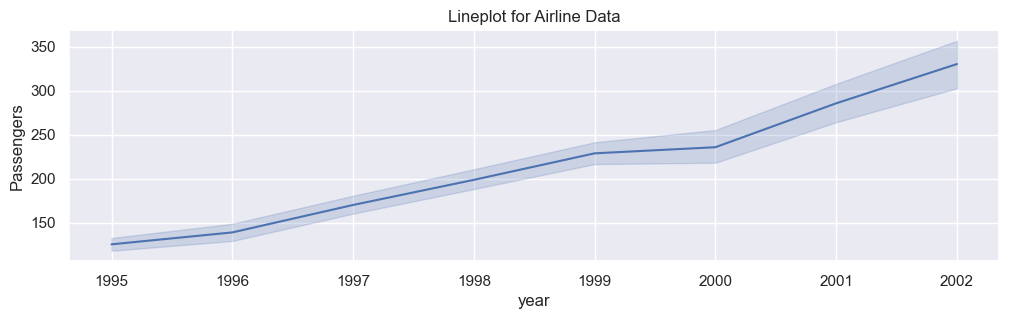

In [256]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines)
plt.title('Lineplot for Airline Data')
plt.show()

## Splitting data

In [257]:
Train = Airlines.head(81) # training data
Test = Airlines.tail(14) # test Data

In [258]:
#Linear model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.87107195088723

In [261]:
#Exponential model
Exp = smf.ols('log_passangers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.37179623821827

In [263]:
#Quadratic model

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

42.709870425152

In [264]:
#Additive seasonality model

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

130.55762388601408

In [278]:
#Additive Seasonality Quadratic model

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.785371911523505

In [279]:
#Multiplicative Seasonality model

Mul_sea = smf.ols('log_passangers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.28596175917127

In [280]:
#Multiplicative Additive Seasonality model

Mul_Add_sea = smf.ols('log_passangers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

13.18807073026334

In [281]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad",
                           "rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,
                                 rmse_Mult_sea,rmse_Mult_add_sea])}

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
6,rmse_Mult_add_sea,13.188071
4,rmse_add_sea_quad,26.785372
1,rmse_Exp,42.371796
2,rmse_Quad,42.709870
0,rmse_linear,47.871072
3,rmse_add_sea,130.557624
5,rmse_Mult_sea,137.285962


## ARIMA model

In [284]:
airline_df = pd.read_excel("Airlines+Data.xlsx",header=0,index_col=0, parse_dates=True)

In [286]:
airline_df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [291]:
len(data)

96

In [292]:
#separate out a validation dataset
split_point = len(data) - 14
dataset_airline, validation_airline = data[0:split_point], data[split_point:]
print('Dataset_airline %d, Validation_airline %d' % (len(dataset_cc), len(validation_cc)))

Dataset_airline 82, Validation_airline 14


In [293]:
dataset_airline.to_csv('dataset_airline.csv', header=False)
validation_airline.to_csv('validation_airline.csv', header=False)

In [294]:
from pandas import read_csv
from math import sqrt

In [295]:
train = read_csv('dataset_airline.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train.head()

0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
Name: 1, dtype: int64

In [296]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

## Validation

In [297]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=183.000, Expected=218.000
>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>

In [298]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad",
                           "rmse_Mult_sea","rmse_Mult_add_sea","ARIMA model"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,
                                 rmse_Mult_sea,rmse_Mult_add_sea,rmse])}

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
6,rmse_Mult_add_sea,13.188071
7,ARIMA model,25.486007
4,rmse_add_sea_quad,26.785372
1,rmse_Exp,42.371796
2,rmse_Quad,42.709870
0,rmse_linear,47.871072
3,rmse_add_sea,130.557624
5,rmse_Mult_sea,137.285962


<h3>Insights:</h3>
    The least RMSE values has the rmse_Mult_add_sea (Multiplicative Additive Seasonality) model and we can final this model and forecast the future predictions.